In [335]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from langdetect import detect

from collections import Counter

In [336]:
neg = pd.read_csv('negative_articles.csv')
pos = pd.read_csv('positive_articles.csv')

In [337]:
pos.sample(2)

,article_pk,domain_pk,domain_name,article_url,label,article_headline,article_text
1158,39717630,192,dcclothesline.com,https://www.dcclothesline.com/?p=132721,1,"As We Trust Govt on COVID-19, Never Forget Ame...","“They were monsters with human faces, in crisp..."
11956,42269432,37651,https://www.theepochtimes.com,https://www.theepochtimes.com/texas-salon-owne...,1,Texas Salon Owner Jailed for Defying Governor’...,Texas Salon Owner Jailed for Defying Governor’...


In [338]:
# with duplicates
pos.shape

(12547, 7)

In [339]:
# with duplicates
neg.shape

(312, 7)

In [340]:
# drop duplicates for positive
pos.drop_duplicates(subset='article_text', keep='first', inplace=True)

In [341]:
neg.drop_duplicates(subset='article_text', keep='first', inplace=True)

In [342]:
neg.sample(2)

,article_pk,domain_pk,domain_name,article_url,label,article_headline,article_text
182,42302300,1594,businessinsider.com,http://nordic.businessinsider.com/us-records-h...,0,The US records its highest daily death toll as...,The US recorded its deadliest day during the c...
16,42332966,9,cnn.com,https://www.cnn.com/2020/05/06/asia/coronaviru...,0,The Wuhan lab at the center of the US-China bl...,Hong Kong (CNN) Questions surrounding the orig...


In [343]:
# without duplicates 
neg.shape

(278, 7)

In [344]:
# without duplicates 
pos.shape

(8419, 7)

In [345]:
# unique domains in negative 
neg['domain_name'].nunique()

41

In [346]:
# unique domains in positive
pos['domain_name'].nunique()

112

Text(0.5, 1.0, 'Article Distribution by Domain for Positive Dataset')

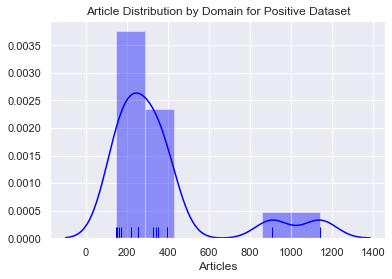

In [347]:
# top 15 positive domains
top_pos_domains = pos.groupby(["domain_name"])["article_text"].count().sort_values(ascending=False)[:15]
sns.set(font_scale = 1, palette = 'deep', color_codes=True)
sns.distplot(top_pos_domains, hist=True, rug=True, axlabel ="Articles", color="blue")
plt.title("Article Distribution by Domain for Positive Dataset")

Text(0.5, 1.0, 'Article Distribution by Domain for Negative Dataset')

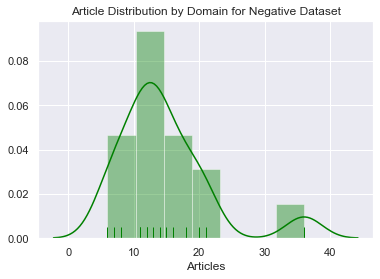

In [348]:
# top 15 positive domains
top_neg_domains = neg.groupby("domain_name")["article_text"].count().sort_values(ascending=False)[:15]
sns.set(font_scale = 1)
sns.distplot(top_neg_domains, hist=True, rug=True, axlabel="Articles", color="green")
plt.title("Article Distribution by Domain for Negative Dataset")

In [349]:
# Top 10 domains in positive dataset
top_pos_domains.head(10)

domain_name
https://www.theepochtimes.com                 1140
breitbart.com                                  906
infowars.com                                   397
aanirfan.blogspot.co.uk                        395
zerohedge.com                                  349
pajamasmedia.com                               341
https://www.timesnownews.com                   328
counterinformation.wordpress.com               254
therussophile.org                              252
https://uprootedpalestinians.wordpress.com     252
Name: article_text, dtype: int64

In [350]:
# Top 10 domains in negative dataset
top_neg_domains.head(10)

domain_name
businessinsider.com    36
jpost.com              21
cnn.com                20
motherjones.com        18
gulfnews.com           16
independent.co.uk      15
cnbc.com               14
foreignpolicy.com      13
slate.com              12
politico.com           12
Name: article_text, dtype: int64

In [430]:
# analyzing negative domains
neg_domains = pd.DataFrame(neg['domain_name'].astype(str))
neg_domains.drop_duplicates(keep='first',inplace=True)
neg_domains.head()

neg_domains['end'] = neg_domains['domain_name'].apply(lambda x: x.split('.')[-1])
neg_domains
#pos_domains['end2'] = pos_domains['domain_name'].apply(lambda x: x.split('.')[-2])
neg_domains.groupby(['end']).count().sort_values( by='domain_name', ascending=False)

,domain_name
end,
com,32
org,2
uk,2
fr,1
it,1
jp,1
lk,1
pk,1


In [434]:
# analyzing positive domains
pos_domains = pd.DataFrame(pos['domain_name'].astype(str))
pos_domains.drop_duplicates(keep='first',inplace=True)
pos_domains.head()


pos_domains['end'] = pos_domains['domain_name'].apply(lambda x: x.split('.')[-1])
pos_domains
#pos_domains['end2'] = pos_domains['domain_name'].apply(lambda x: x.split('.')[-2])
pos_by_end = pos_domains.groupby(['end']).count().sort_values( by='domain_name', ascending=False)
pos_by_end.head()

,domain_name
end,
com,77
news,16
org,9
net,6
biz,1


In [352]:
pos['article_text'] = pos['article_text'].astype(str)

In [353]:
pos.head(1)

,article_pk,domain_pk,domain_name,article_url,label,article_headline,article_text
0,46858240,3922,westernjournal.com,https://www.westernjournal.com/first-four-fact...,1,Gretchen Whitmer: First Four Facts You Need To...,Democratic Gov. Gretchen Whitmer has made quit...


In [354]:
tokenizer = RegexpTokenizer(r'\w+')

In [355]:
# tokenizing text 
pos['tokenized'] = [tokenizer.tokenize(text) for text in pos['article_text']]    

In [356]:
def lower_case(col):
    lower_tokens = [tok.lower() for tok in col]
    return lower_tokens

In [357]:
# lower-casing 
pos['tokenized'] = [lower_case(col) for col in pos['tokenized']]

In [358]:
pos.head(1)

,article_pk,domain_pk,domain_name,article_url,label,article_headline,article_text,tokenized
0,46858240,3922,westernjournal.com,https://www.westernjournal.com/first-four-fact...,1,Gretchen Whitmer: First Four Facts You Need To...,Democratic Gov. Gretchen Whitmer has made quit...,"[democratic, gov, gretchen, whitmer, has, made..."


In [359]:
stopwords_english = stopwords.words('english')

In [360]:
# removing stopwords
def no_stopwords(col):
    nostop_words = [tok for tok in col if tok not in stopwords_english]
    return nostop_words

In [361]:
pos['clean'] = [no_stopwords(col) for col in pos['tokenized']]

In [362]:
pos.head(1)

,article_pk,domain_pk,domain_name,article_url,label,article_headline,article_text,tokenized,clean
0,46858240,3922,westernjournal.com,https://www.westernjournal.com/first-four-fact...,1,Gretchen Whitmer: First Four Facts You Need To...,Democratic Gov. Gretchen Whitmer has made quit...,"[democratic, gov, gretchen, whitmer, has, made...","[democratic, gov, gretchen, whitmer, made, qui..."


In [363]:
def alpha_only(col):
    alpha_tokens = [tok for tok in col if tok.isalpha()]
    return alpha_tokens

In [364]:
# getting alpha characters only
pos['clean'] = [alpha_only(tok) for tok in pos['clean']]

In [365]:
pos.head(1)

,article_pk,domain_pk,domain_name,article_url,label,article_headline,article_text,tokenized,clean
0,46858240,3922,westernjournal.com,https://www.westernjournal.com/first-four-fact...,1,Gretchen Whitmer: First Four Facts You Need To...,Democratic Gov. Gretchen Whitmer has made quit...,"[democratic, gov, gretchen, whitmer, has, made...","[democratic, gov, gretchen, whitmer, made, qui..."


In [366]:
# dumping all text together 
all_text = []
for text in pos['clean']:
    for word in text:
        all_text.append(word)

In [367]:
pos['length'] = [len(text) for text in pos['clean']]

In [368]:
pos.head(2)

,article_pk,domain_pk,domain_name,article_url,label,article_headline,article_text,tokenized,clean,length
0,46858240,3922,westernjournal.com,https://www.westernjournal.com/first-four-fact...,1,Gretchen Whitmer: First Four Facts You Need To...,Democratic Gov. Gretchen Whitmer has made quit...,"[democratic, gov, gretchen, whitmer, has, made...","[democratic, gov, gretchen, whitmer, made, qui...",495
1,38076419,51,aanirfan.blogspot.co.uk,http://aanirfan.blogspot.com/2020/05/randolph-...,1,NaN,"Aangirfan\nFriday, 1 May 2020\nRANDOLPH STEWAR...","[aangirfan, friday, 1, may, 2020, randolph, st...","[aangirfan, friday, may, randolph, stewart, ra...",455


In [369]:
# average length of article for positive dataset
average_length_pos = pos['length'].mean()
average_length_pos

843.5172823375698

In [370]:
# max length of article for positive dataset
max_length_pos = pos['length'].max()
max_length_pos

12416

In [371]:
# min length of article for positive dataset
min_length_pos = pos['length'].min()
min_length_pos

7

In [372]:
pos['length'].describe()

count     8419.000000
mean       843.517282
std       1164.251556
min          7.000000
25%        303.000000
50%        486.000000
75%        864.000000
max      12416.000000
Name: length, dtype: float64

In [373]:
# function to check for language 
def english_only(token):
    english_only = []
    for word in token:
        if detect(word) == 'en': 
            return True
        else:
            return False
    

In [374]:
# filtering for english only
test = pd.DataFrame(pos['clean'][:3])
test.head()

,clean
0,"[democratic, gov, gretchen, whitmer, made, qui..."
1,"[aangirfan, friday, may, randolph, stewart, ra..."
2,"[senator, tom, cotton, believes, chinese, comm..."


In [375]:
pos['string'] =pos['clean'].astype(str)
#pos['string']=' ,'.join(text for text in pos['string'])

In [376]:
pos.head(1)

,article_pk,domain_pk,domain_name,article_url,label,article_headline,article_text,tokenized,clean,length,string
0,46858240,3922,westernjournal.com,https://www.westernjournal.com/first-four-fact...,1,Gretchen Whitmer: First Four Facts You Need To...,Democratic Gov. Gretchen Whitmer has made quit...,"[democratic, gov, gretchen, whitmer, has, made...","[democratic, gov, gretchen, whitmer, made, qui...",495,"['democratic', 'gov', 'gretchen', 'whitmer', '..."


In [377]:
pos['language'] = english_only(pos['string'])

In [378]:
pos.head(1)

,article_pk,domain_pk,domain_name,article_url,label,article_headline,article_text,tokenized,clean,length,string,language
0,46858240,3922,westernjournal.com,https://www.westernjournal.com/first-four-fact...,1,Gretchen Whitmer: First Four Facts You Need To...,Democratic Gov. Gretchen Whitmer has made quit...,"[democratic, gov, gretchen, whitmer, has, made...","[democratic, gov, gretchen, whitmer, made, qui...",495,"['democratic', 'gov', 'gretchen', 'whitmer', '...",True


In [379]:
# checking to see if any language is picking up as False
non_english = pos.loc[pos['language'] == False]




In [380]:
# looks like none of it is picking up
non_english.head()

,article_pk,domain_pk,domain_name,article_url,label,article_headline,article_text,tokenized,clean,length,string,language


In [381]:
len(all_text)

7101572

In [382]:
# most common words in positive corpus
Counter(all_text).most_common(20)

[('coronavirus', 39910),
 ('people', 38767),
 ('said', 28044),
 ('may', 26934),
 ('covid', 26866),
 ('new', 26487),
 ('one', 24978),
 ('china', 24958),
 ('virus', 24030),
 ('us', 23865),
 ('trump', 23019),
 ('world', 22444),
 ('would', 22166),
 ('government', 21657),
 ('also', 20354),
 ('health', 18774),
 ('state', 18539),
 ('april', 16432),
 ('like', 16176),
 ('even', 15221)]

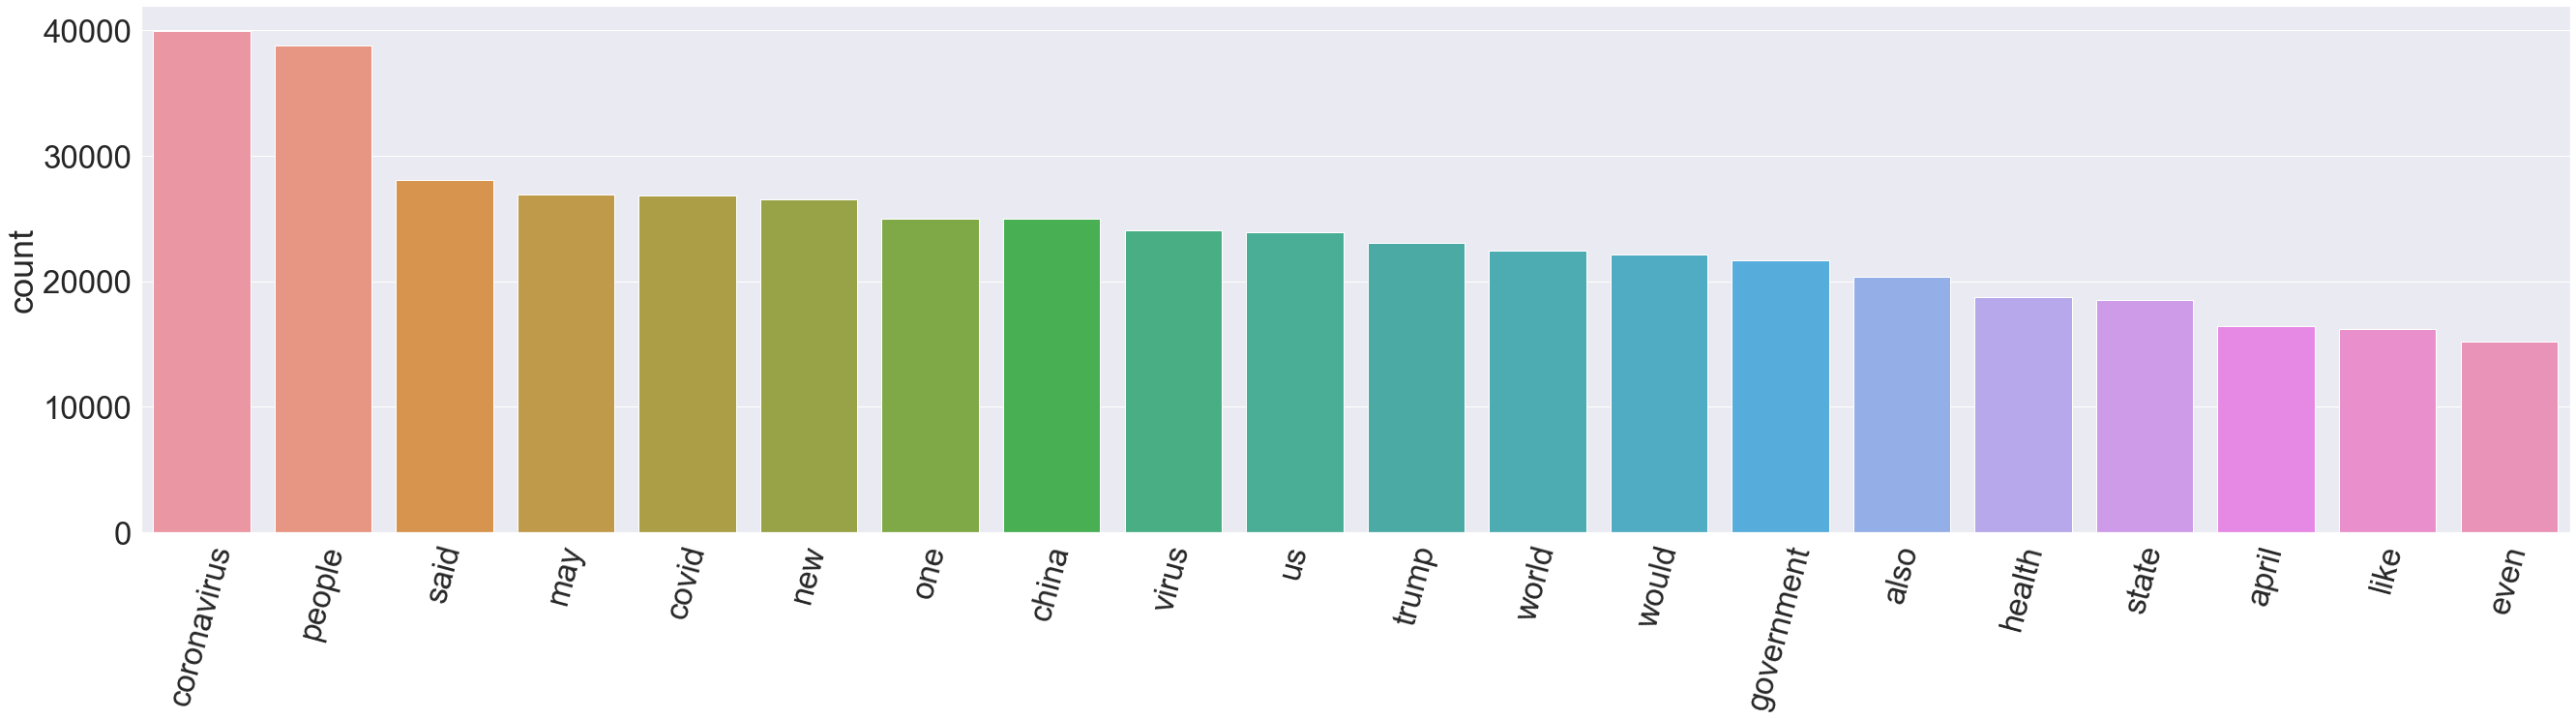

<Figure size 432x288 with 0 Axes>

In [389]:
# plotting top 20 most common words for positive dataset
sns.set(font_scale = 3)
plt.figure(figsize=(45,10))
sns.countplot(all_text, order=pd.Series(all_text).value_counts().index[:20])
plt.xticks(rotation=75)
plt.show()
plt.savefig("top 20 most common words for positive dataset")




In [384]:
# Processing negative dataset 

# converting to string
neg['article_text'] = neg['article_text'].astype(str)

# tokenizing text 
neg['tokenized'] = [tokenizer.tokenize(text) for text in neg['article_text']]  

# lower-casing 
neg['tokenized'] = [lower_case(col) for col in neg['tokenized']]

# removing stopwords
neg['clean'] = [no_stopwords(col) for col in neg['tokenized']]

# getting alpha characters only
neg['clean'] = [alpha_only(tok) for tok in neg['clean']]

# counting words
neg['length'] = [len(text) for text in neg['clean']]

# dumping all text together 
all_text_neg = []
for text in neg['clean']:
    for word in text:
        all_text_neg.append(word)

In [385]:
# most common words in negative corpus
Counter(all_text_neg).most_common(20)

[('coronavirus', 2320),
 ('people', 1292),
 ('said', 1237),
 ('de', 1226),
 ('new', 953),
 ('health', 887),
 ('covid', 836),
 ('audio', 760),
 ('one', 718),
 ('virus', 692),
 ('pandemic', 682),
 ('would', 639),
 ('la', 639),
 ('also', 631),
 ('us', 595),
 ('time', 591),
 ('like', 584),
 ('may', 572),
 ('trump', 553),
 ('world', 539)]

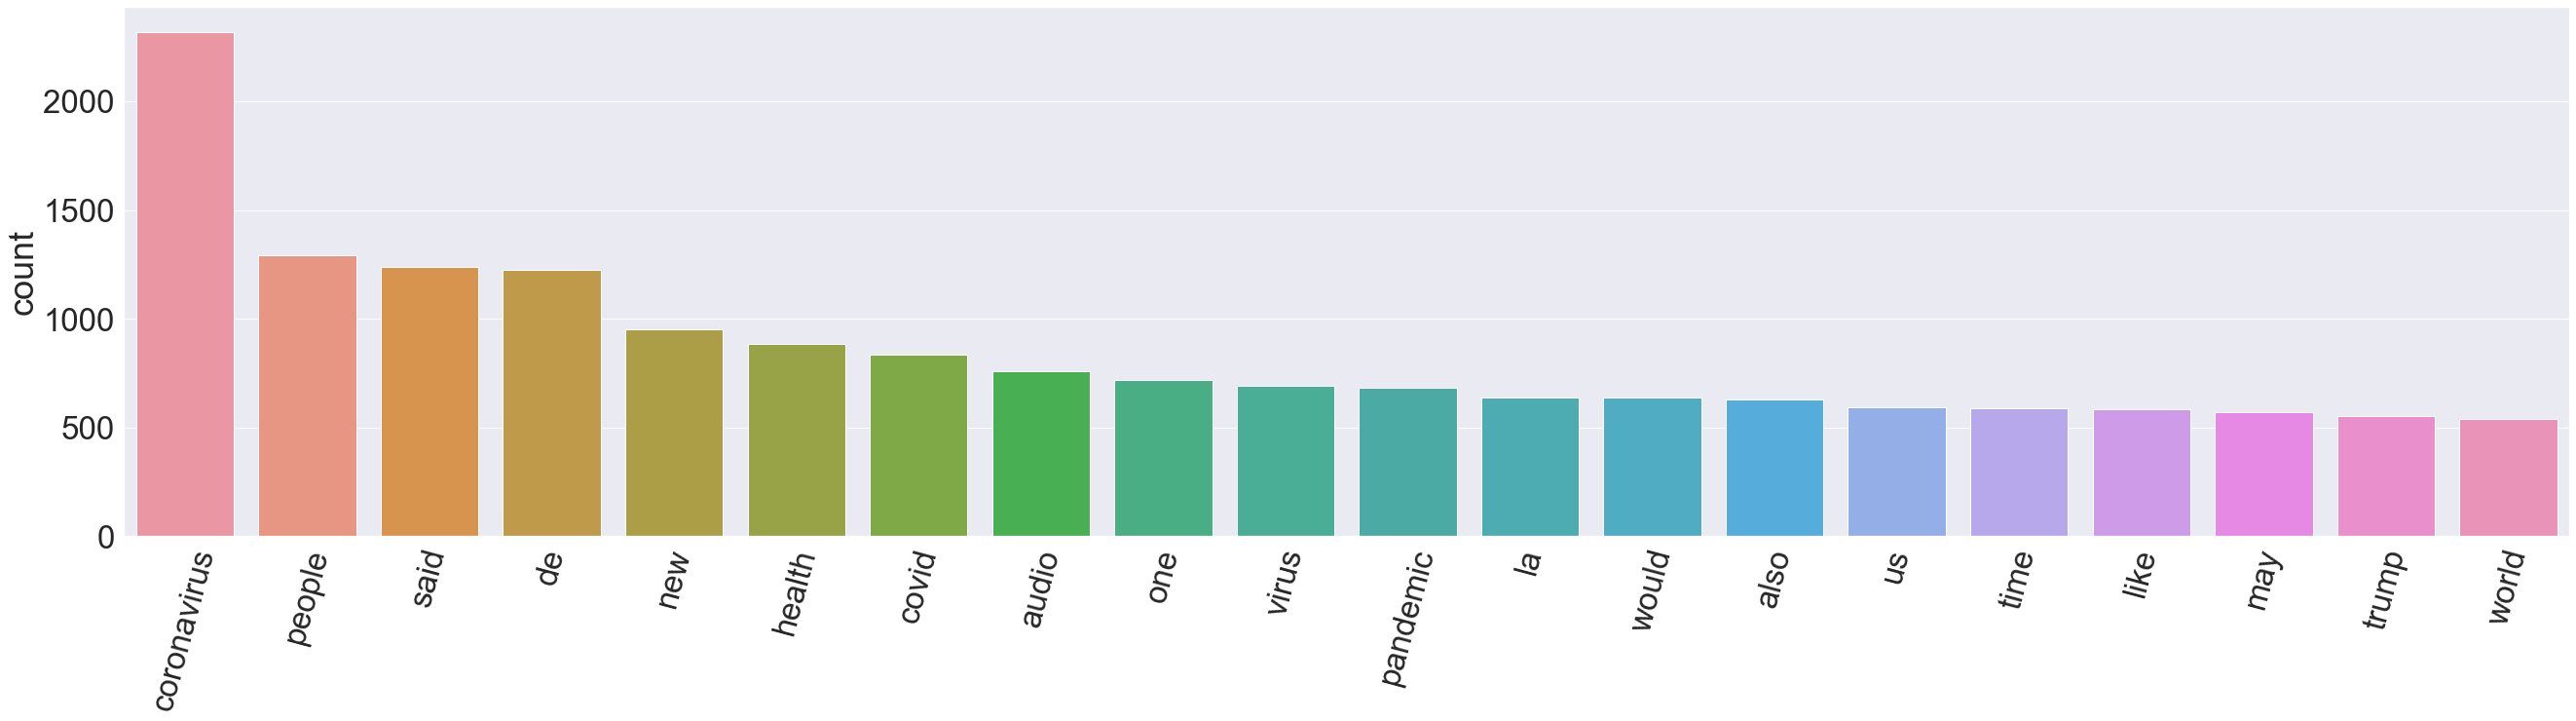

<Figure size 432x288 with 0 Axes>

In [390]:
# plotting top 20 most common words for negative dataset
sns.set(font_scale = 3)
plt.figure(figsize=(45,10))
sns.countplot(all_text_neg, order=pd.Series(all_text_neg).value_counts().index[:20])
plt.xticks(rotation=75)
plt.show()
plt.savefig("top 20 most common words for negative dataset")


In [387]:
pos['length'].describe()

count     8419.000000
mean       843.517282
std       1164.251556
min          7.000000
25%        303.000000
50%        486.000000
75%        864.000000
max      12416.000000
Name: length, dtype: float64